# Simple Linear Regression

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [177]:
df = pd.DataFrame(data, columns=['Population', 'Profit'], index=None)

In [178]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [179]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [181]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [182]:
sns.set_style('whitegrid')

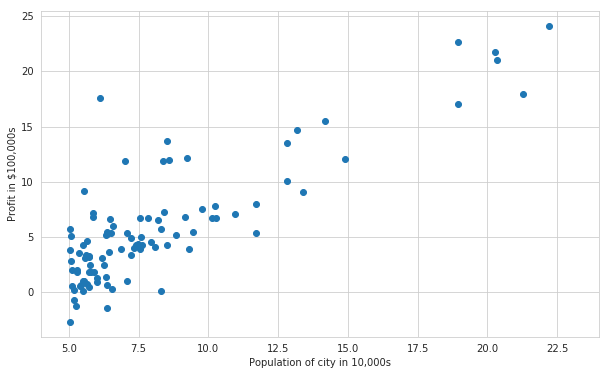

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(df.Population, df.Profit)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $100,000s')
ax.set_xlim(4, 24);

In [184]:
# Implement Simple Linear Regression

In [185]:
X = data[:, 0]
y = data[:, 1]

In [186]:
X.shape, y.shape

((97,), (97,))

In [187]:
X = X[..., None]

In [188]:
X.shape, y.shape

((97, 1), (97,))

In [189]:
m, n = X.shape

In [190]:
X = np.c_[(np.ones(m), data[:, 0])]

In [191]:
X.shape, y.shape

((97, 2), (97,))

In [192]:
theta = np.zeros((n + 1, ))

In [193]:
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.asscalar(np.dot((h-y), (h-y).T))
    return J

In [194]:
compute_cost(X, y, theta)

32.07273387745567

In [195]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        h = np.dot(X, theta)
        delta = (1/m) * np.dot(X.T, (h - y))
        theta = theta - alpha * delta
        J_history[iter] = compute_cost(X, y, theta)
    return (theta, J_history)

In [196]:
theta, cost_J = gradient_descent(X, y, theta, 0.01, 1500); print(theta)

[-3.63029144  1.16636235]


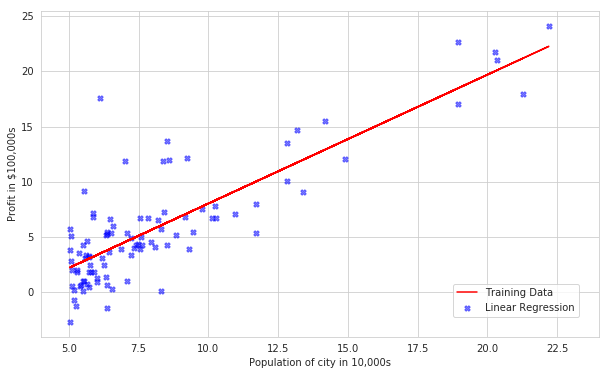

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X[:, 1], y, marker='X', c='blue', linewidths=1, alpha=0.5, s=30)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $100,000s')
ax.set_xlim(4, 24)
ax.plot(X[:, 1], X @ theta, c='red')
ax.legend(('Training Data', 'Linear Regression'), loc=4, borderaxespad=2)

In [198]:
predict1 = [1, 3.5]  @ theta
print(f'For population = 35,000, we predict a profit of %f\n{predict1*10000}');
predict2 = [1, 7] @ theta
print(f'For population = 70,000, we predict a profit of %f\n{predict2*10000}');

For population = 35,000, we predict a profit of %f
4519.7678677017675
For population = 70,000, we predict a profit of %f
45342.45012944714


In [199]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [200]:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

Text(0.5, 1.0, 'Error vs. Training Epoch')

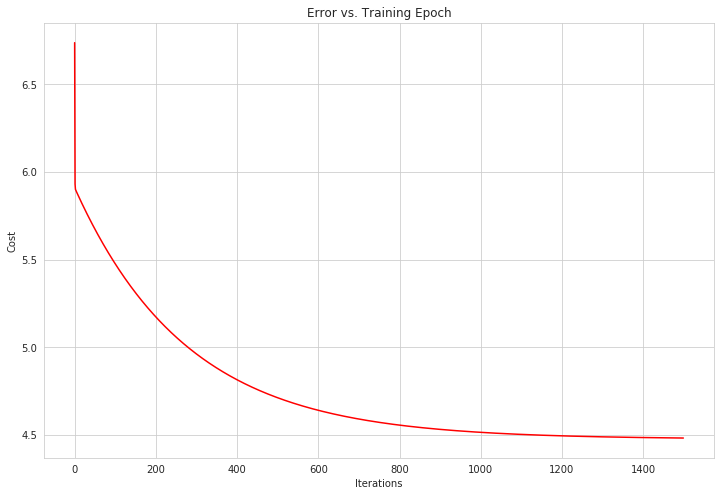

In [203]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1500), cost_J, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')